In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma
from scipy.stats import norm
from random import sample
import math

In [2]:
def estimators(alpha, beta, sample_size):
    numbers = gamma.rvs(a = alpha, scale = beta, size = 100000)
    samples = sample(numbers.tolist(), sample_size)
    mean = np.mean(samples)
    variance = np.var(samples)
    alpha_hat,_, beta_hat = gamma.fit(samples)
    x = np.linspace(np.min(numbers), np.max(numbers))

    return x, alpha_hat, alpha, beta_hat, beta, samples
    
def plot(x, alpha_hat, alpha, beta_hat, beta, samples):
    plt.hist(samples, bins = 50, density=True, label='Sample Histogram')
    plt.plot(x, gamma.pdf(x, a = alpha_hat, scale = beta_hat), label = 'Estimated Density')
    plt.plot(x, gamma.pdf(x, a = alpha, scale = beta), label = 'True Density')
    plt.legend(loc="upper right")
    plt.title('50 samples')

In [3]:
alpha = 4
beta = 0.6

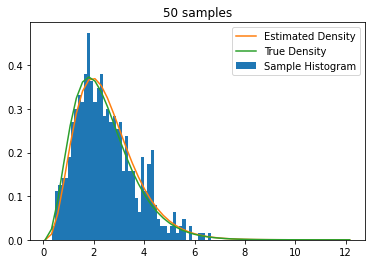

In [4]:
x, alpha_hat, alpha, beta_hat, beta, samples = estimators(alpha, beta, 500)
plot(x, alpha_hat, alpha, beta_hat, beta, samples)

In [5]:
def mvd_plotting(alpha, beta, B, sample_size):
    r = []
    for i in range(B):
        x, alpha_hat, alpha, beta_hat, beta, samples = estimators(alpha, beta, sample_size)
        r.append(math.sqrt(sample_size)*(alpha_hat - alpha)/math.sqrt(2*alpha_hat*(alpha_hat + 1)))
    x = np.linspace(np.min(r), np.max(r))
    plt.hist(r, bins = 50, density=True, label='Histogram calculated')    
    plt.plot(x, norm.pdf(x), label = 'Normal Density')
    plt.legend(loc="upper right")
    plt.title('50 samples')

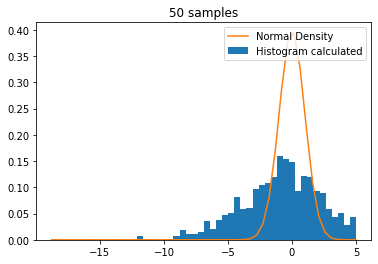

In [6]:
mvd_plotting(alpha, beta, 1000, 50)